In [2]:
'''
Sample from multivariate gaussian. 2 ways. scipy.stats.multivariate_normal or np.random.multivariate_normal
'''
from scipy.stats import multivariate_normal as scipy_mvn
import numpy as np
import matplotlib.pyplot as plt

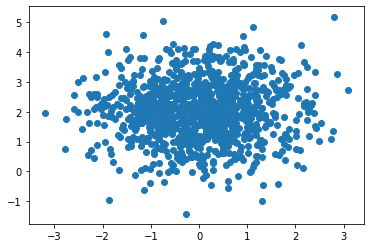

In [7]:
mu=np.array([0,2])
cov=[[1,0],[0,1]]
r=multivariate_normal.rvs(mean=mu,cov=cov,size=1000)
plt.scatter(r[:,0],r[:,1])

#### The above can also be done by-

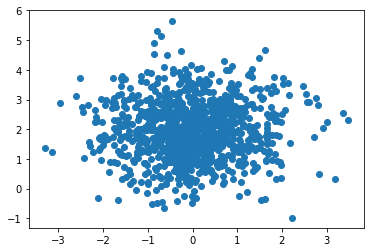

In [8]:
r=np.random.multivariate_normal(mean=mu,cov=cov,size=1000)
plt.scatter(r[:,0],r[:,1])

In [9]:
multivariate_normal.pdf?

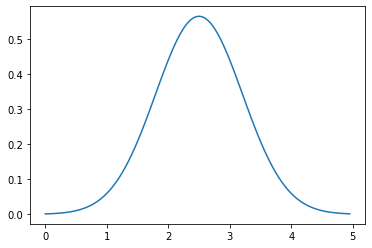

In [14]:
x = np.linspace(0, 5, 100, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)
plt.plot(x, y);

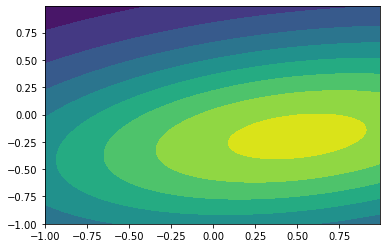

In [15]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [15]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

### evaluate 1D gaussian at given x. Plot 1D gaussian

In [40]:
'''pdf of the univariate normal distribution.'''
def univariate_normal(x, mean, variance):
    return ((1. / np.sqrt(2 * np.pi * variance)) *np.exp(-(x - mean)**2 / (2 * variance)))

'''
Or use equivalently-
scipy_mvn.pdf(x, mean=2.5, cov=0.5)
same API
''';

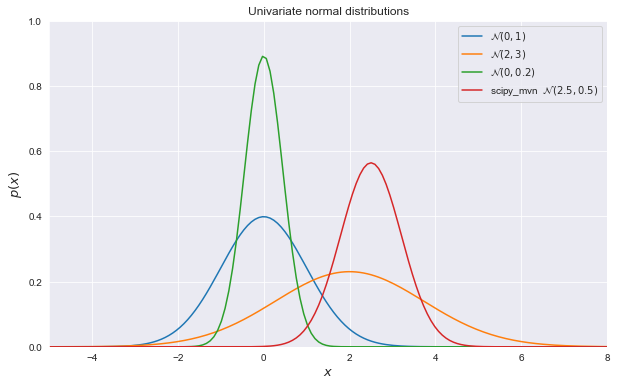

In [50]:
# Plot different Univariate Normals
x = np.linspace(-5, 8, num=150)
fig = plt.figure(figsize=(10, 6))
plt.plot(x, univariate_normal(x, mean=0, variance=1), label="$\mathcal{N}(0, 1)$")
plt.plot(x, univariate_normal(x, mean=2, variance=3), label="$\mathcal{N}(2, 3)$")
plt.plot(x, univariate_normal(x, mean=0, variance=0.2), label="$\mathcal{N}(0, 0.2)$")
plt.plot(x, scipy_mvn.pdf(x, mean=2.5, cov=0.5), label="scipy_mvn  $\mathcal{N}(2.5, 0.5)$")


plt.xlabel('$x$', fontsize=13)
plt.ylabel('$p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-5, 8])
plt.legend()
plt.show()

In [18]:
'''pdf of the multivariate normal distribution.'''

def multivariate_normal(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

'''
Or use equivalently-
scipy_mvn.pdf(x, mean=2.5, cov=0.5)
same API
''';

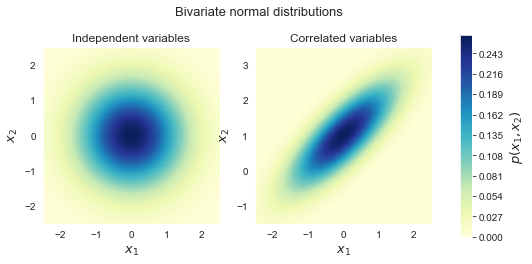

In [19]:
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()

In [20]:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)
# Sample X from standard normal
n = 50  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = L.dot(X) + mean

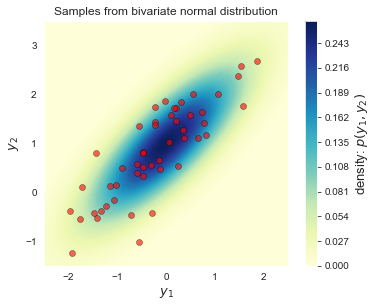

In [21]:
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()

In [22]:
d = 2  # dimensions
mean = np.matrix([[0.], [1.]])
cov = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0,0]
mean_y = mean[1,0]
# Get the blocks (single values in this case) from 
#  the covariance matrix
A = cov[0, 0]
B = cov[1, 1]
C = cov[0, 1]  # = C transpose in this case

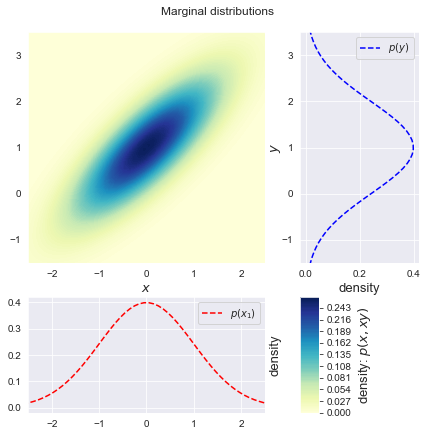

In [23]:
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=100)
py = univariate_normal(y, mean_y, A)
# Plot univariate distribution
ax2.plot(py, y, 'b--', label=f'$p(y)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=100)
px = univariate_normal(x, mean_x, B)
# Plot univariate distribution
ax3.plot(x, px, 'r--', label=f'$p(x_1)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, xy)$', fontsize=13)
plt.show()

In [24]:
y_condition = 1.  # To condition on y
mean_xgiveny = mean_x + (C * (1/B) * (y_condition - mean_y))
cov_xgiveny = A - C * (1/B) * C

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
cov_ygivenx = B - (C * (1/A) * C)

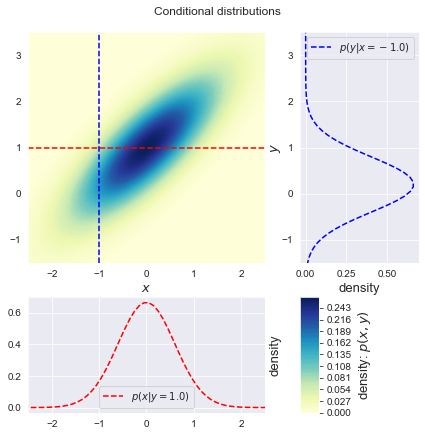

In [25]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.YlGnBu)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], 'r--')
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-1.5, 3.5], 'b--')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=100)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, 'b--', 
         label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=100)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, 'r--', 
         label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
plt.show()
#

## 3D plotting

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


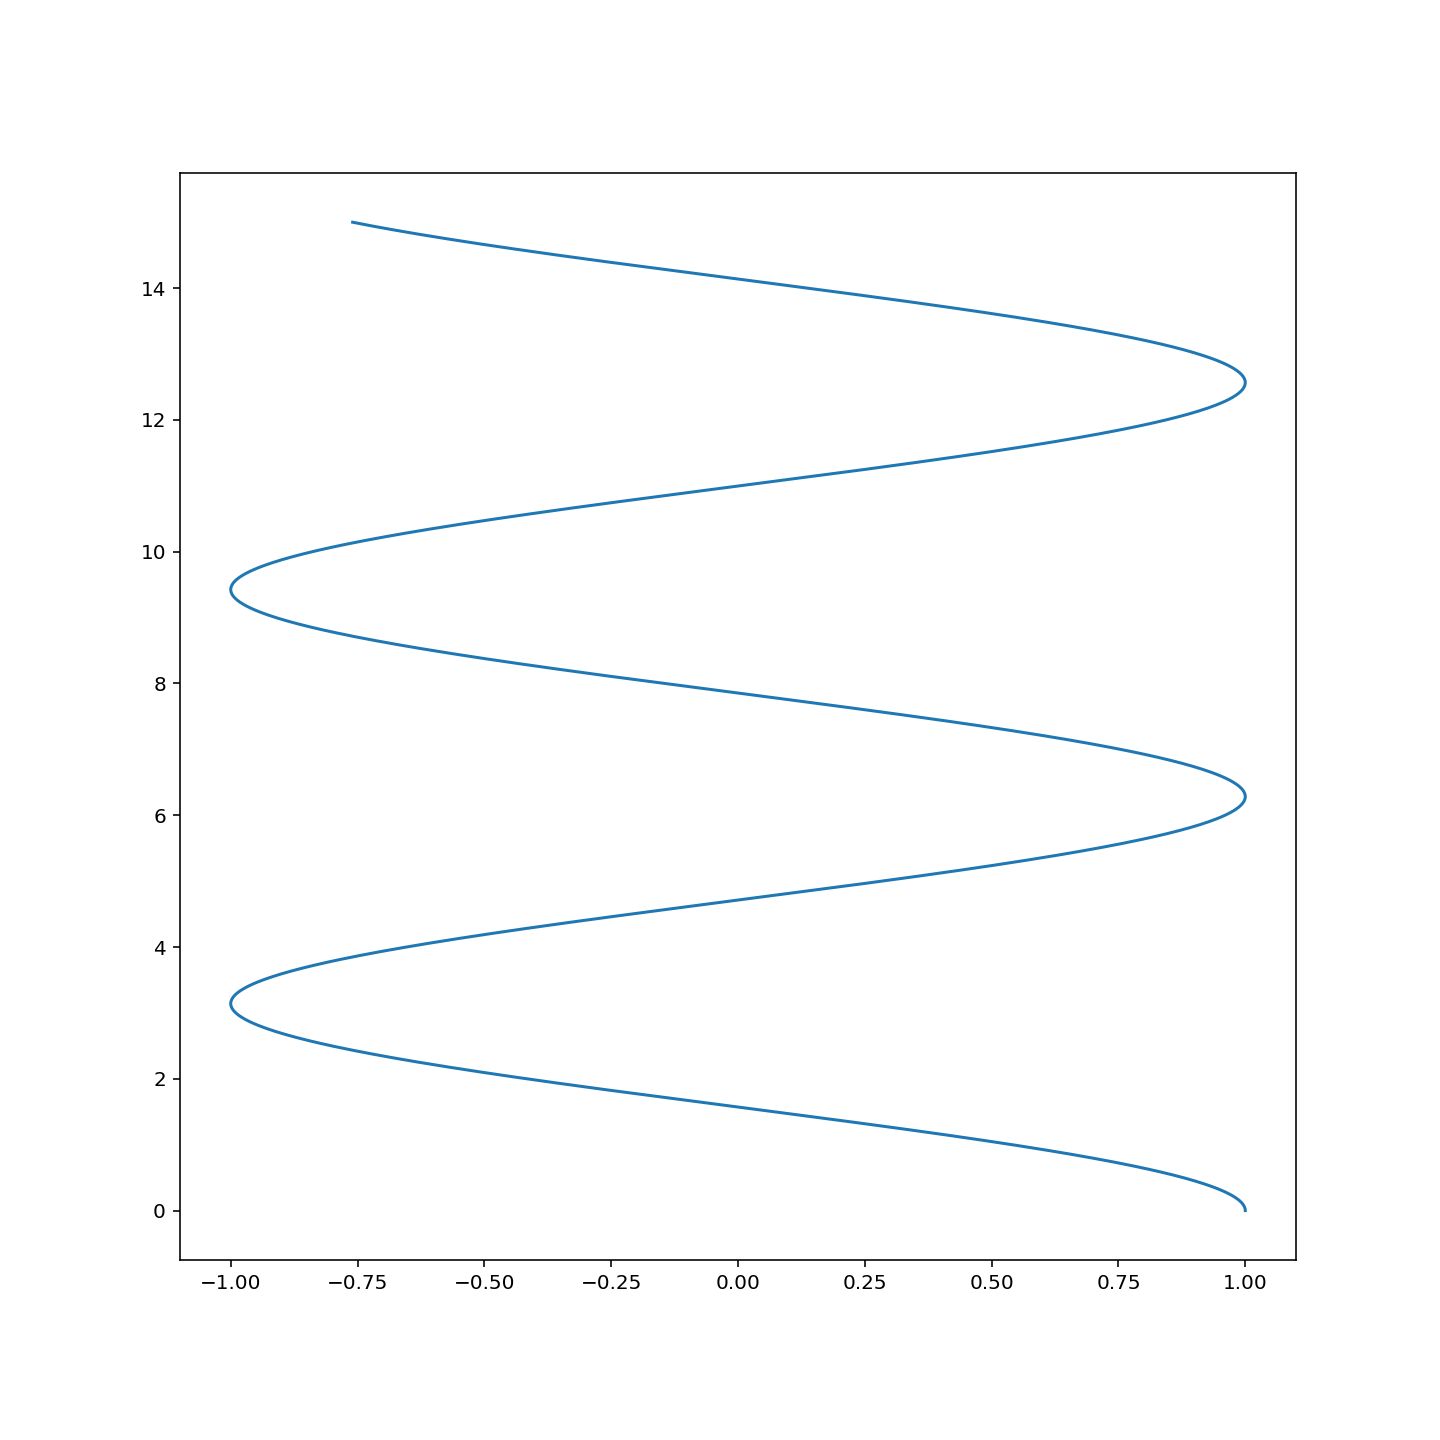

<IPython.core.display.Javascript object>


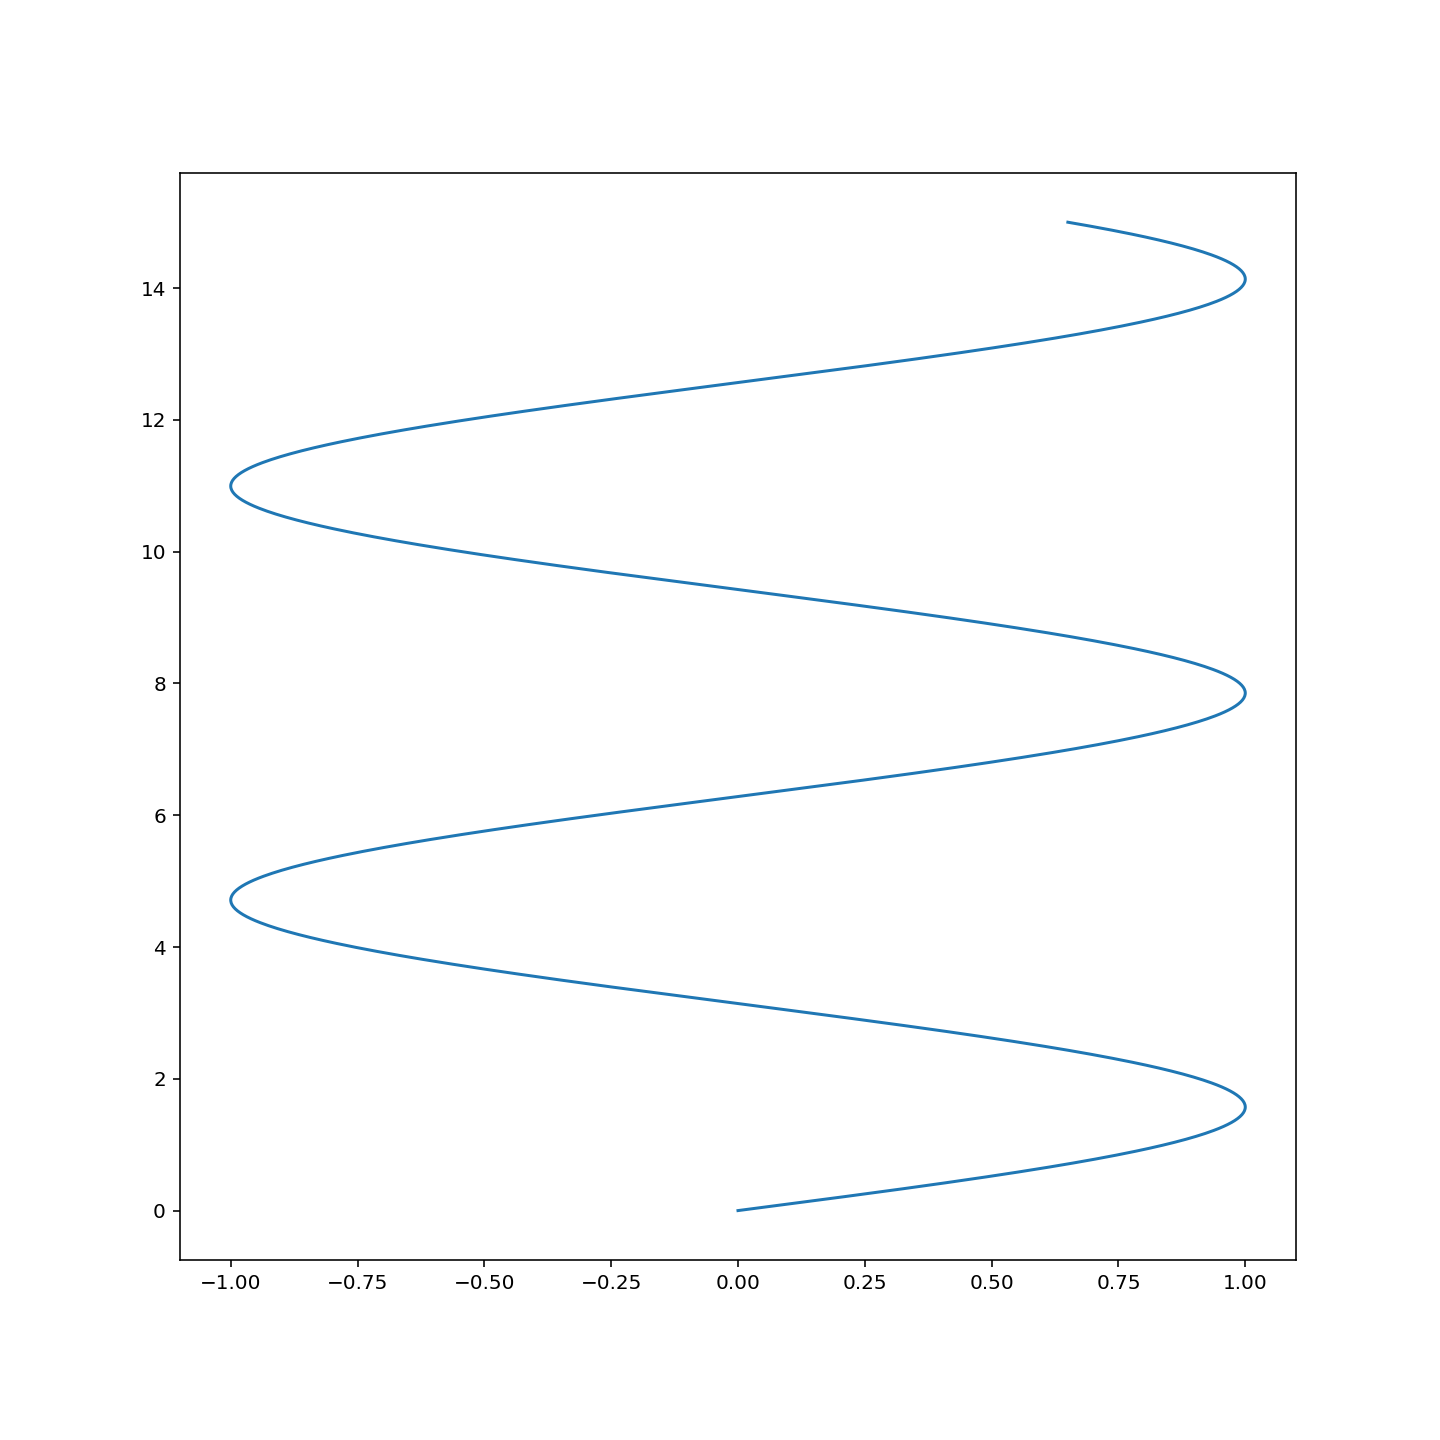

<IPython.core.display.Javascript object>


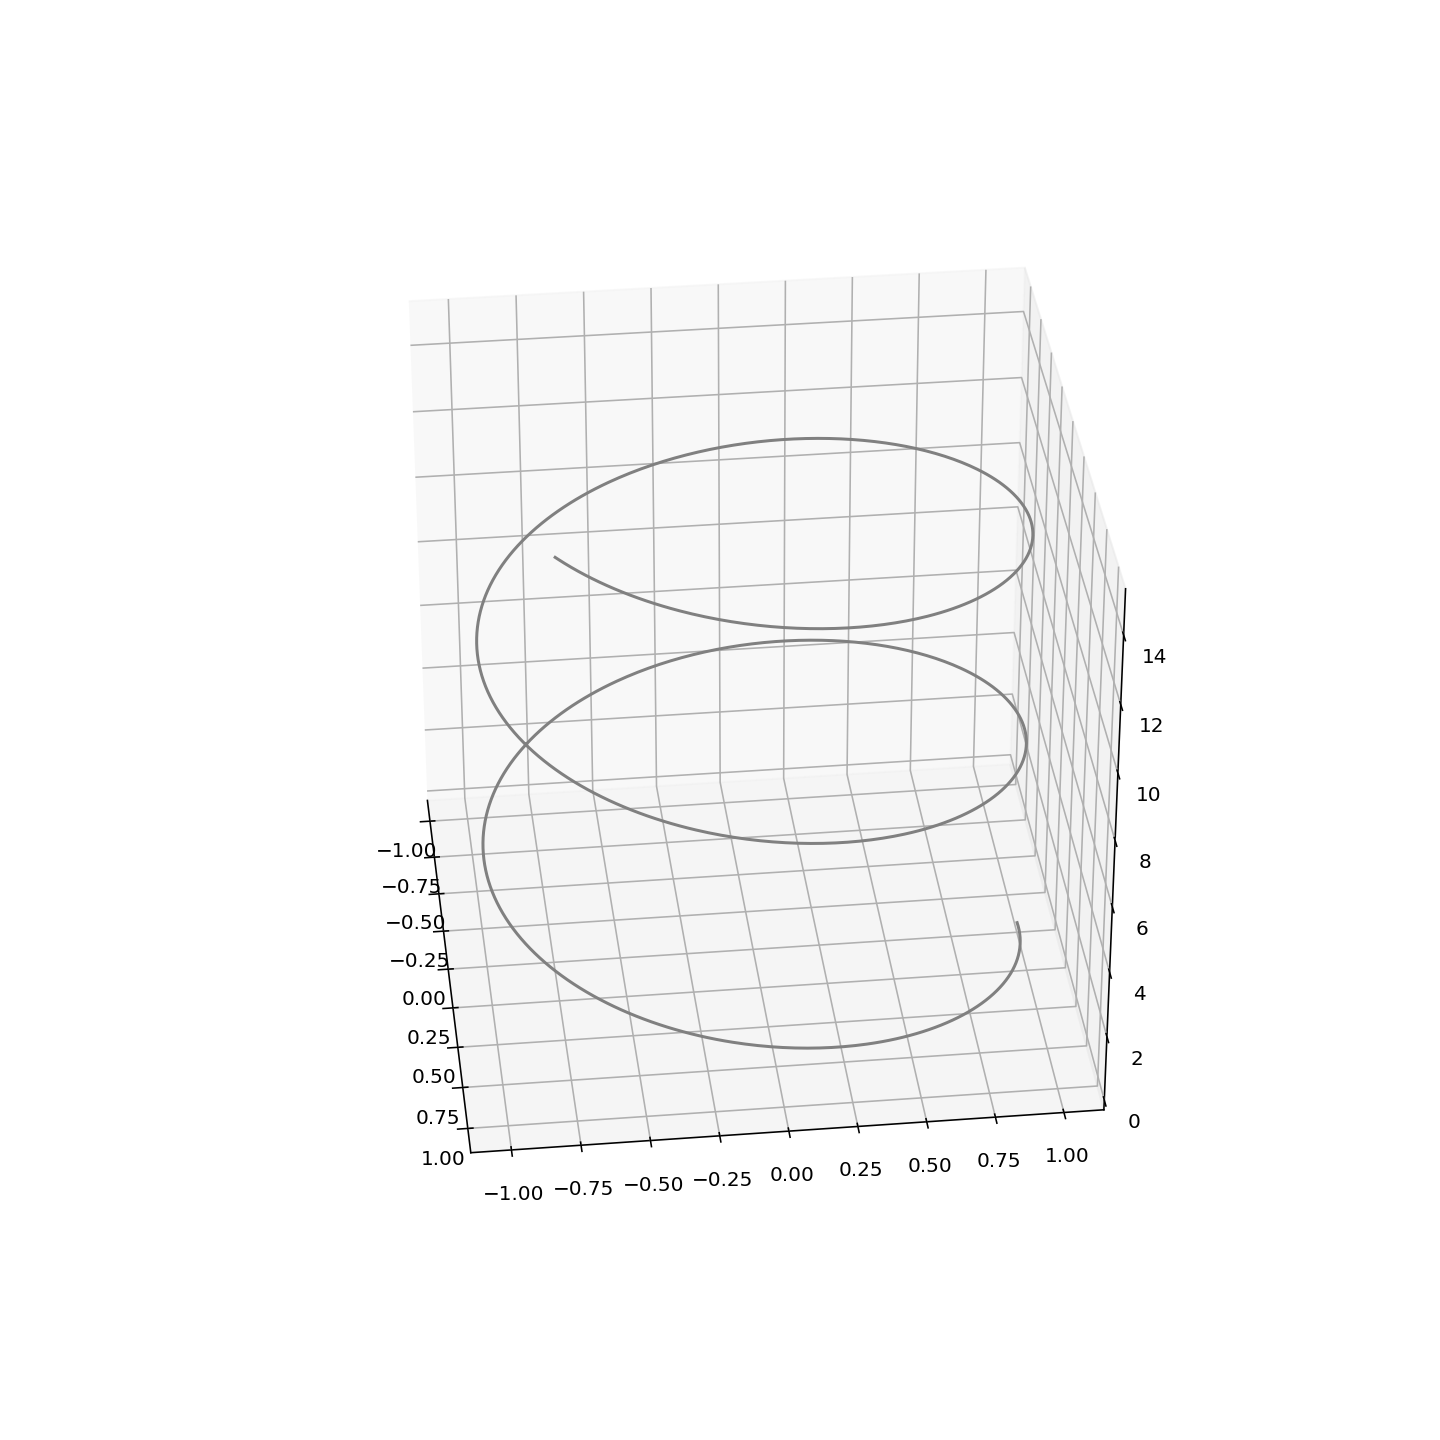

In [39]:
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
fig = plt.figure(figsize=(10, 10))
plt.plot(yline,zline) #2d
fig = plt.figure(figsize=(10, 10))
plt.plot(xline,zline) #2d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d') # combines the above 2Ds

ax.plot3D(xline, yline, zline, 'gray')
plt.show()

<IPython.core.display.Javascript object>


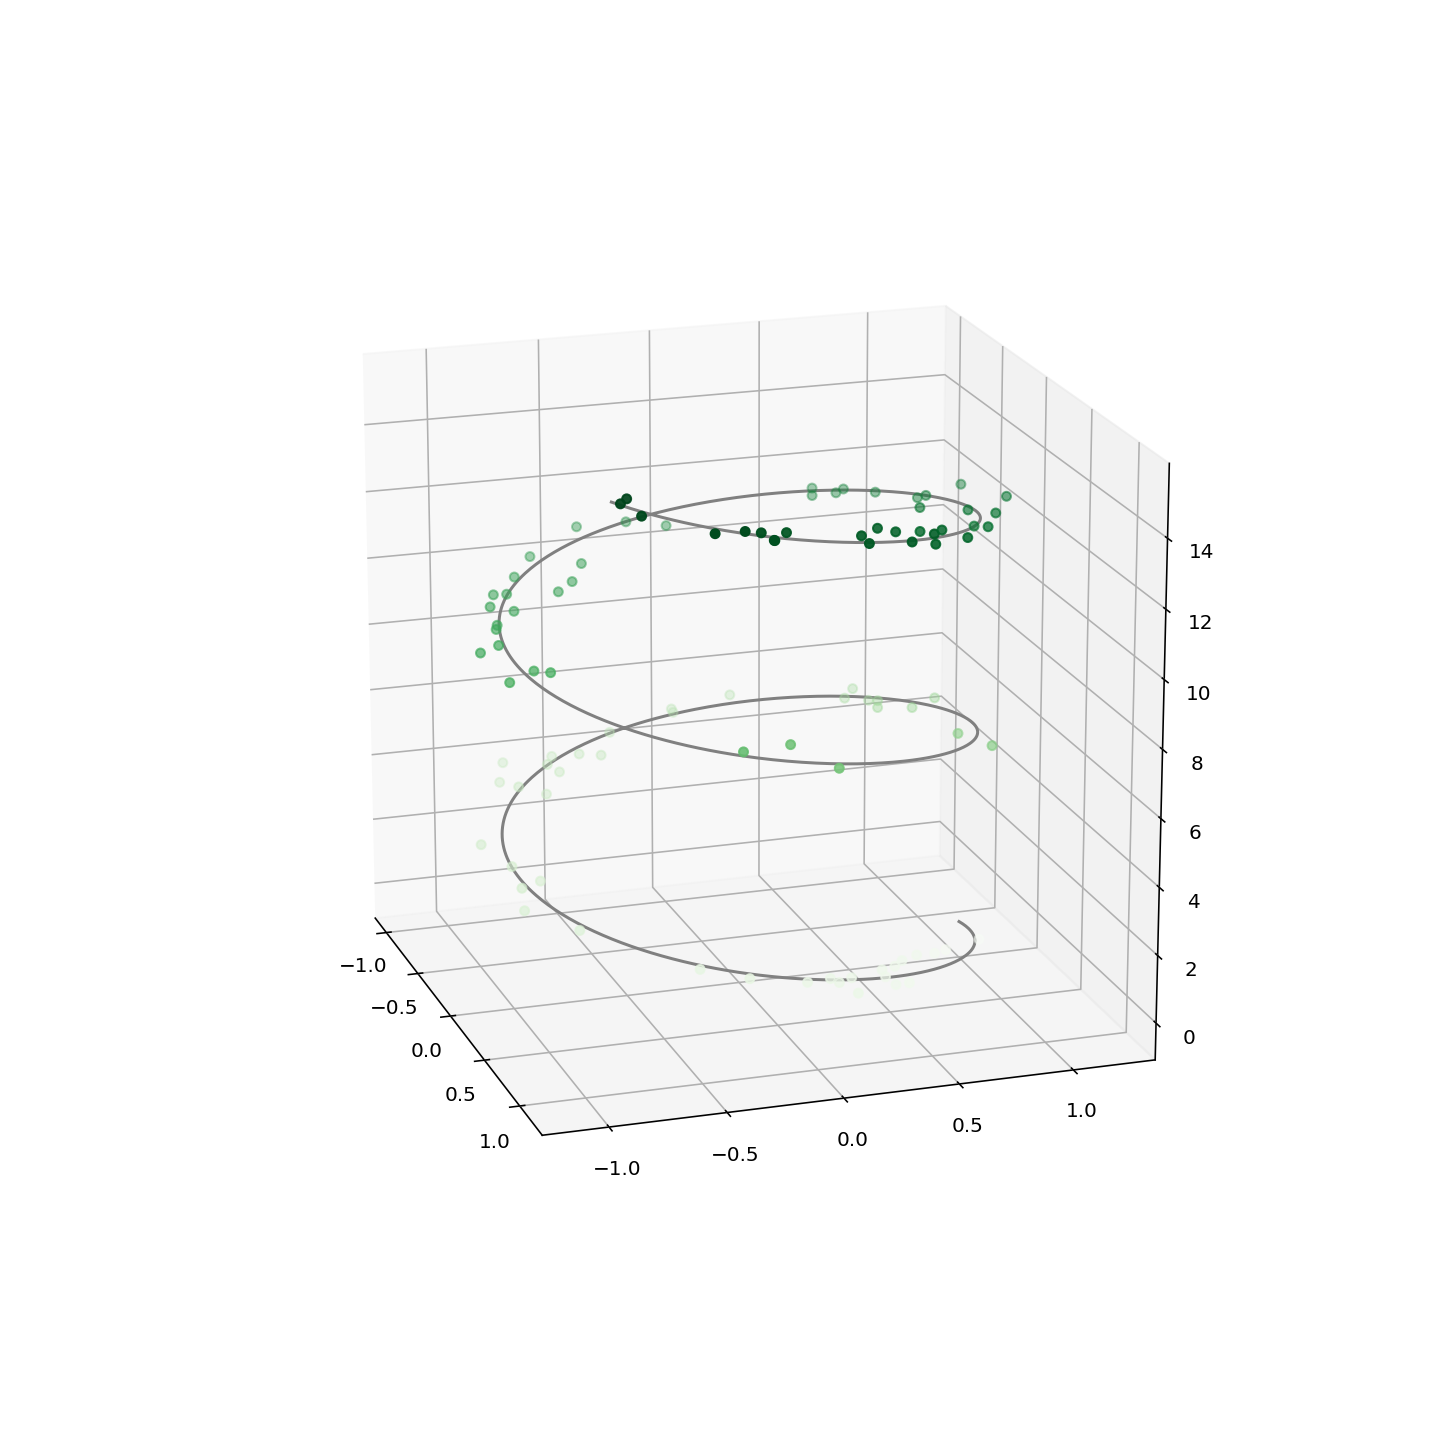

In [40]:
%matplotlib notebook
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
plt.show()

### Three-dimensional Contour Plots

In [41]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


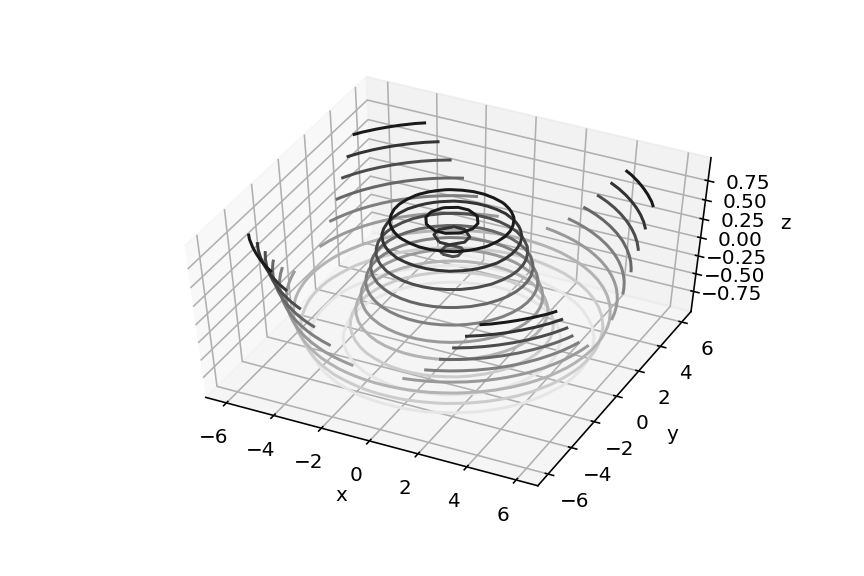

In [50]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 10, cmap='binary')  # change number of contours. 10 right now
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

<IPython.core.display.Javascript object>


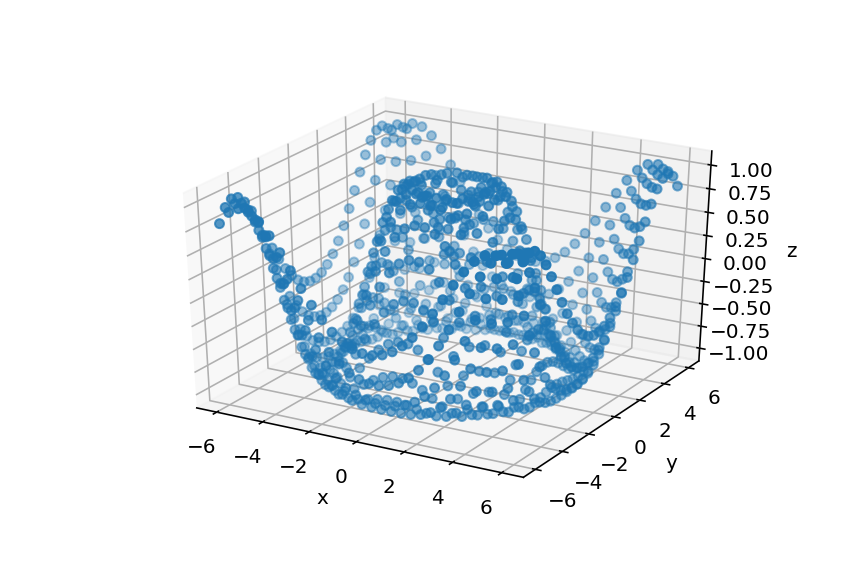

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

<IPython.core.display.Javascript object>


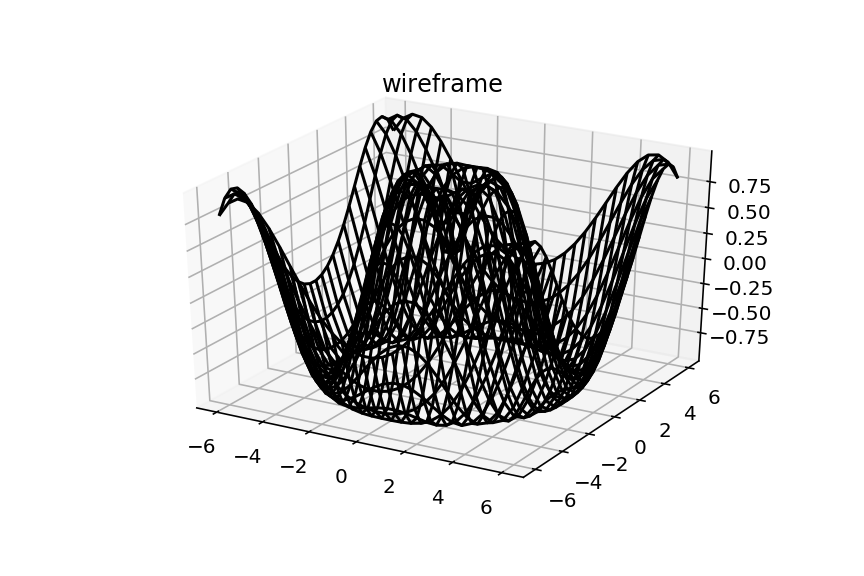

<IPython.core.display.Javascript object>


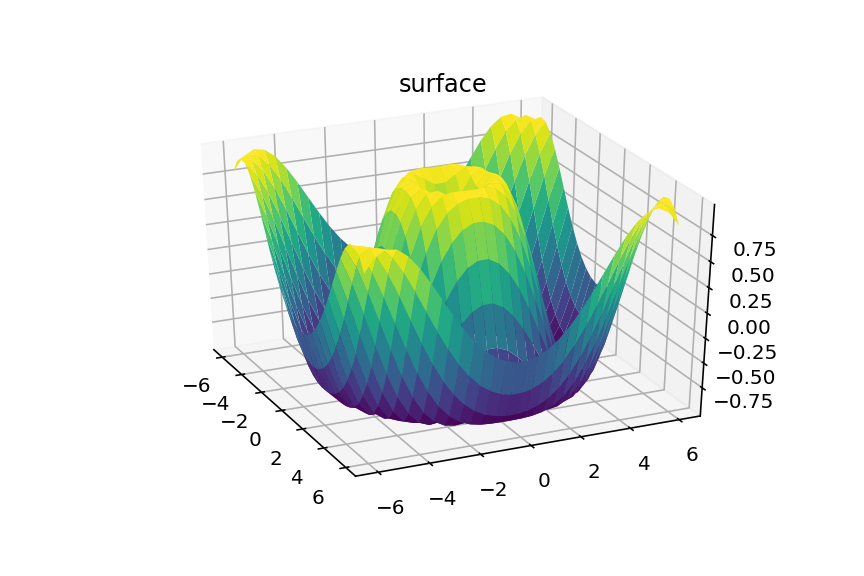

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

'''add color map to above view'''
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

<IPython.core.display.Javascript object>


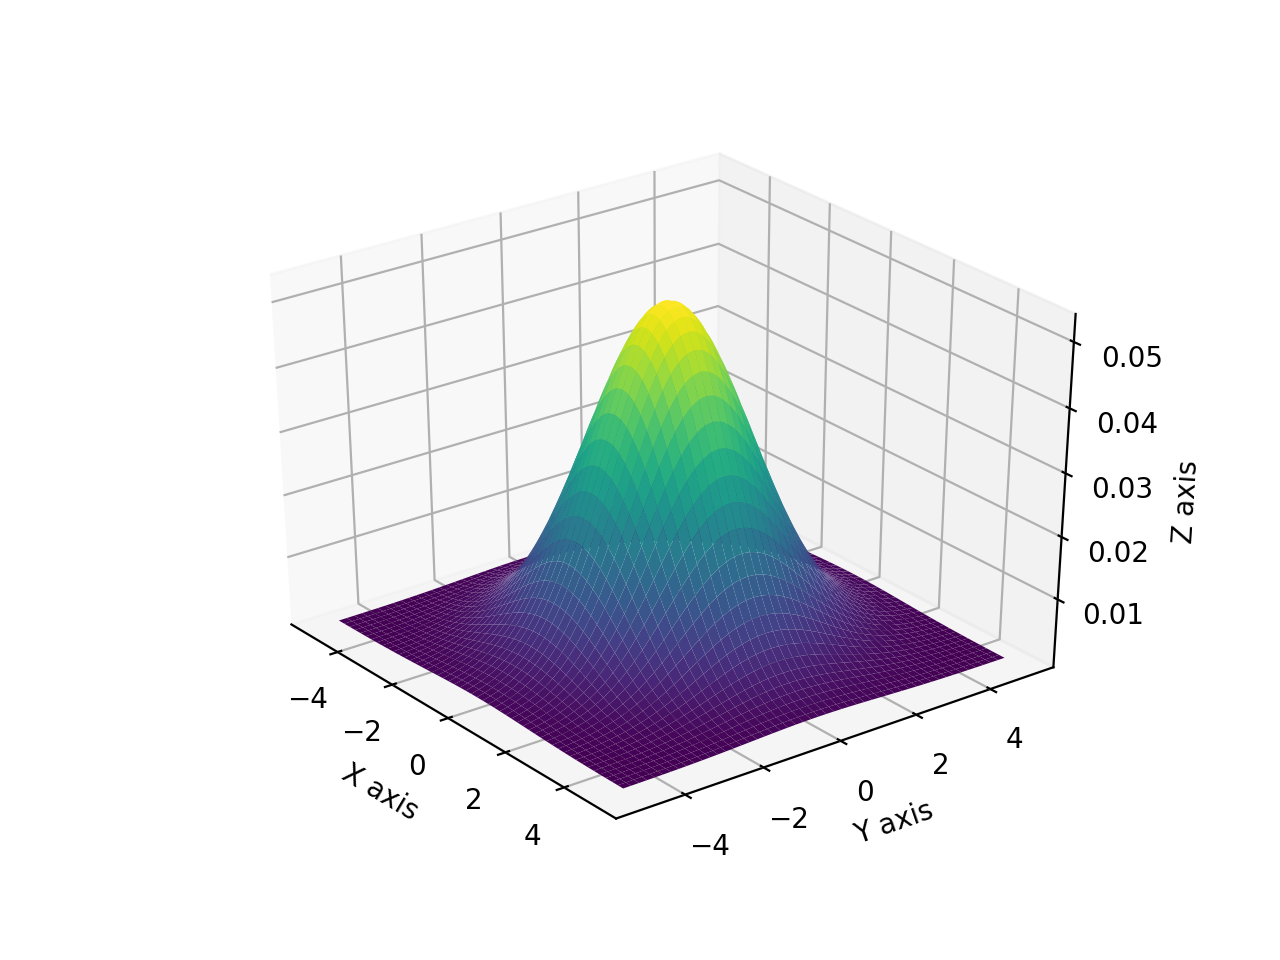

In [6]:
from scipy.stats import multivariate_normal

#Parameters to set
mu_x1 = 0
variance_x1 = 3

mu_x2 = 0
variance_x2 = 3

#Create grid and multivariate normal
x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
rv = scipy_mvn([mu_x1, mu_x2], [[variance_x1, 0], [0, variance_x2]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()